In [2]:
import numpy as np
import matplotlib.pyplot as plt

Randomly generate 100 values for each $\mathbf{y}$ and $\mathbf{x}$.

We will also generate a residual for each value to simulate some error in the linear relationship between $\mathbf{x}$ and $\mathbf{y}$. We will use predetermined values of $\alpha = 2$ and $\beta = 0.3$ for generating these values.

In [5]:
np.random.seed(0)

# define alpha, beta
alpha = 2
beta = 0.3

# generate x, y
x = 2 * np.random.randn(100) + 3   # Array of 100 values with mean = 2, stddev = 3
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = alpha + beta * x + res                  # Actual values of Y

Now let's do OLS!

The aim of OLS is to estimate values of $\alpha$ and $\beta$ to estimate response variables $\hat y$ with the linear model:

$$\hat{y}_i = \alpha + \beta x_i$$

For OLS, we need to estimate $\alpha$ and $\beta$ that minimize the squared errors between the observed reponse variables and the predicted response variables for each predictor $X$:

$$SSE = \sum_{i=1}^{N}\left(y_i-\hat y_i \right)^2$$

You can estimate the parameters as follows:

$$\beta = \frac{\sum_{i=1}^{N} \left(x_i-\bar{\mathbf{x}} \right) \left(y_i-\bar{\mathbf{y}} \right)}{\sum _{i=1}^{N} \left( x_i - \bar{\mathbf{x}} \right)^2} = \frac{Cov(\mathbf{x},\mathbf{y})}{Var(\mathbf{x})}$$

$$ \alpha = \bar{\mathbf{y}} - \beta \bar{\mathbf{x}} $$

In [6]:
xbar = np.mean(x)
ybar = np.mean(y)

# estimate beta and alpha from data
betaHat = np.sum((x-xbar)*(y-ybar))/np.sum((x-xbar)**2)
alphaHat = ybar - betaHat*xbar

print('betaHat = %.5f, alphaHat = %.5f' % (betaHat, alphaHat))

betaHat = 0.32867, alphaHat = 1.95155


How well do these match up with the actual values that we used to generate the data?

Now that we have the estimated parameters, let's predict values of $\hat{\mathbf{y}}$ given the values $\mathbf{x}$.

In [8]:
yhat = alphaHat + betaHat*x

Let's plot our values of $\hat{\mathbf{y}}$ against our training values of $\mathbf{y}$.

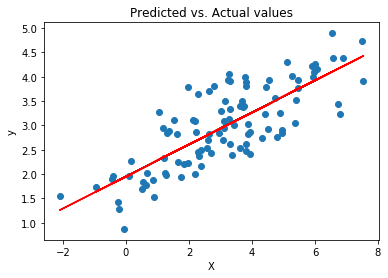

In [10]:
plt.scatter(x, y)   # scatter plot showing actual data
plt.plot(x, yhat, 'r')     # regression line
plt.title('Predicted vs. Actual values')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

We can also check the Pearson correlation between $\hat{\mathbf{y}}$ and $\mathbf{y}$:

In [14]:
from scipy.stats import pearsonr

corr, _ = pearsonr(yhat, y)
print("Pearson's r = %.3f" % corr)

Pearson's r = 0.790
